In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('training_clean_and_complete.csv')

In [3]:
# df.columns

In [4]:
# # Let's drop the first column
# df = df.drop(df.columns[0], axis=1)

In [5]:
# # Let's move our target variable to the end of the df
# col = df.pop("diabetes_mellitus")
# df.insert(143, col.name, col)

In [6]:
# # Let's rewrite our training dataset
# df.to_csv("training_final.csv", encoding='utf-8', index=True)

In [2]:
df = pd.read_csv('training_final.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'readmission_status', 'apache_post_operative', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache',
       ...
       'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'diabetes_mellitus'],
      dtype='object', length=145)

In [4]:
# Let's drop the first column
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus
0,214826,118,0,92,0,0,0,0,0,0,...,36.1,557,487.0,4.2,3.8,145.0,145.0,23.3,12.7,1
1,246060,81,0,90,0,0,0,0,0,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,1
2,276985,118,0,93,0,0,0,0,0,0,...,25.9,198,43.0,5.0,3.5,139.0,138.0,9.0,8.0,0
3,262220,118,1,92,0,1,0,0,1,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,0
4,201746,33,0,91,0,0,0,0,0,0,...,44.2,159,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0


## Create X (matrix of features) and y (target variable vector)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,214826,118,0,92,0,0,0,0,0,0,...,36.9,36.1,557,487.0,4.2,3.8,145.0,145.0,23.3,12.7
1,246060,81,0,90,0,0,0,0,0,1,...,34.5,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1
2,276985,118,0,93,0,0,0,0,0,0,...,34.0,25.9,198,43.0,5.0,3.5,139.0,138.0,9.0,8.0
3,262220,118,1,92,0,1,0,0,1,1,...,34.5,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1
4,201746,33,0,91,0,0,0,0,0,0,...,44.2,44.2,159,159.0,3.9,3.7,137.0,137.0,10.9,10.9
5,182697,83,0,95,0,0,0,0,0,0,...,37.5,33.5,295,278.0,5.0,4.2,136.0,135.0,9.3,5.9
6,195124,83,0,95,0,0,0,0,1,1,...,25.5,25.5,260,260.0,5.8,2.4,140.0,140.0,12.8,12.8
7,179261,33,0,91,0,0,0,0,0,1,...,37.9,37.9,226,226.0,5.2,5.2,142.0,142.0,24.7,24.7
8,271041,118,0,114,0,0,0,0,0,1,...,37.2,37.2,232,232.0,4.1,3.3,139.0,139.0,12.8,12.8
9,238874,118,0,114,0,0,0,0,0,0,...,34.5,34.5,257,257.0,4.2,4.2,137.0,137.0,10.3,10.3


## Split data into train and test set

In [6]:
# We'll split using the 30/70 rule, that is 30% of data will be our test and 70% will be our training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Feature Scaling

In [7]:
from sklearn import preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Note that thte 60th column is a
X_train[:, 60:] = sc.fit_transform(X_train[:, 60:])
X_test[:, 60:] = sc.transform(X_test[:, 60:])

In [21]:
print(df.shape)
print(X_train.shape)

(130156, 144)
(91109, 143)


In [10]:
X_train = pd.DataFrame(X_train,columns= df.columns[:-1])
X_test = pd.DataFrame(X_test,columns= df.columns[:-1])

In [11]:
X_train

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,163735.0,6.0,0.0,918.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.936328,1.100007,0.890660,1.036406,-0.549496,-2.046661,-0.467469,-1.013847,0.168033,0.414801
1,148357.0,64.0,0.0,683.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.883486,1.476148,-0.653463,-0.826973,0.558968,0.498733,1.286036,0.702949,-0.262602,-0.570203
2,160875.0,163.0,0.0,1078.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.096935,-0.623971,0.975104,0.227307,-0.549496,-0.410336,1.066848,-0.155449,1.858909,1.447057
3,256354.0,58.0,0.0,1019.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.831823,1.914979,-1.148064,-1.035377,-0.866199,-0.410336,-0.029093,0.273750,-0.579245,-0.442988
4,237869.0,175.0,1.0,1068.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.678012,0.379071,-0.593145,-0.667605,-0.866199,-0.410336,0.409283,0.702949,-1.101707,-1.079061
5,276967.0,161.0,1.0,413.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.385254,0.598487,0.154789,0.288603,0.242264,0.862361,-0.686657,-0.370048,-0.357595,-0.188559
6,187176.0,194.0,1.0,609.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.609128,0.802229,-0.122670,-0.103688,-1.182903,-0.773964,-0.686657,-0.370048,0.054042,0.283952
7,178514.0,118.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.781339,0.958955,0.106535,0.239566,-0.549496,-0.046709,0.409283,0.702949,-0.800895,-0.697417
8,273980.0,196.0,0.0,809.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.131377,0.128311,-0.569018,-0.446942,-0.391144,0.135105,-0.905845,-0.584648,-1.085875,-1.024540
9,186835.0,79.0,0.0,337.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.079714,0.175328,-0.569018,-0.446942,0.242264,0.862361,-0.029093,0.273750,1.969735,2.482947


## Rebalance training dataset

In [13]:
# Check balance
target_count = df['diabetes_mellitus'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 102005
Class 1: 28151
Proportion: 3.62 : 1


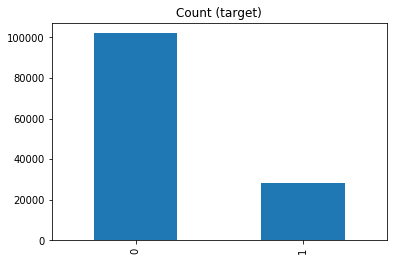

In [12]:
target_count.plot(kind='bar', title='Count (target)');

In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diabetes_mellitus==0]
df_minority = df[df.diabetes_mellitus==1]
 

### Under sampling/Down Sampling

In [19]:
# # Downsample majojrity class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=40000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.diabetes_mellitus.value_counts()

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=.65, random_state=50, replacement=False) 
# sample without replacement
# sampling strategy =.65 allows for 40/60 balance of target variable
# corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Check how many observations were removed -- looks like about 50,000
print(len(X_rus))
print(len(X_train))
print(len(y_rus))
print(len(y_train))

50154
91109
50154
91109


In [21]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 30396, 1: 19758})


### Over sampling/Up Sampling

In [22]:
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=70000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.diabetes_mellitus.value_counts()

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=.65, random_state=50)
# sampling strategy =.65 allows for 40/60 balance of target variable (40% - 0 and 60% - 1)
# sampling strategy corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling. 
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [42]:
print(len(X_ros))
print(len(X_train))
print(len(y_ros))
print(len(y_train))

117729
91109
117729
91109


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
X_train.shape

(91109, 143)

In [15]:
X_ros = pd.DataFrame(X_ros,columns=df.columns[:-1])


In [16]:
clf = LinearDiscriminantAnalysis(n_components=5)

In [17]:
X_train = clf.fit_transform(X_ros, y_ros)
X_test = clf.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [36]:
X_test

array([[  0.17626389],
       [ -2.29620839],
       [  4.07249001],
       ...,
       [  2.25808334],
       [  7.51252261],
       [-35.36446468]])

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10, random_state=0)

classifier.fit(X_train, y_ros)
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[29949   705]
 [ 7813   580]]
Accuracy: 0.7818526391272057


In [23]:
clf.explained_variance_ratio_

array([1.])

In [54]:
clf.classes_

array([0, 1], dtype=int64)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_ros.columns
vif_data["VIF"] = [variance_inflation_factor(X_ros.values, i) 
                          for i in range(len(X_ros.columns))] 
  
print(vif_data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier()
# fit the model
model.fit(X_ros, y_ros)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (X_ros.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()